In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import mnist as MNIST

In [2]:
#opening data
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print("the first element of the dataset \n" , X_test[0])
print("\n the first element of y is",Y_test[0])
# this tells us that there are 60,000 data and each is a 28 x 28 array
# since it is 28x28 the input shape would be 784
# we are gonna be normalizing the data so that it is more suitable for model training
tf.keras.utils.normalize(X_train,axis=1)
tf.keras.utils.normalize(X_test,axis=1)
X_train.shape


the first element of the dataset 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222

(60000, 28, 28)

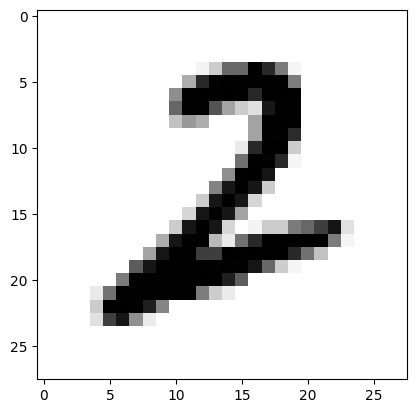

answer ->  2


In [3]:
# we will be viewing the data here using matplotlib
import random
def image(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show()
m = random.randint(0,60000)
image(X_train[m])
print("answer -> ",Y_train[m])

In [4]:
#training the nueral network in this 
model = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(units = 128,activation = tf.nn.relu),
        Dense(units = 128,activation = tf.nn.relu),
        Dense(units = 10,activation = tf.nn.softmax)

    ],name = "Model_1"
    
)




In [5]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
    
)
model.fit(X_train,Y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8629 - accuracy: 0.8796
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3800 - accuracy: 0.9304
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2282 - accuracy: 0.9455


In [7]:
evaulation = model.evaluate(X_test,Y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.2248 - accuracy: 0.9471
